In [1]:
# importing the libraries
import yfinance as yf
import matplotlib. pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers, Model
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras. utils.vis_utils import plot_model

In [2]:
#data collection

start_date = '2010-01-01'
end_date = '2023-07-22'
ticker_symbol = 'AAPL'
start_date = '1980-12-12'
end_date = '2023-07-22'
df = yf.download(ticker_symbol, start=start_date, end=end_date)

df = df.reset_index()
df


[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...,...
10736,2023-07-17,191.899994,194.320007,191.809998,193.990005,193.990005,50520200
10737,2023-07-18,193.350006,194.330002,192.419998,193.729996,193.729996,48353800
10738,2023-07-19,193.100006,198.229996,192.649994,195.100006,195.100006,80507300
10739,2023-07-20,195.089996,196.470001,192.500000,193.130005,193.130005,59581200


In [3]:
#moving average for 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
10736    170.1602
10737    170.6084
10738    171.0654
10739    171.5296
10740    171.9698
Name: Close, Length: 10741, dtype: float64

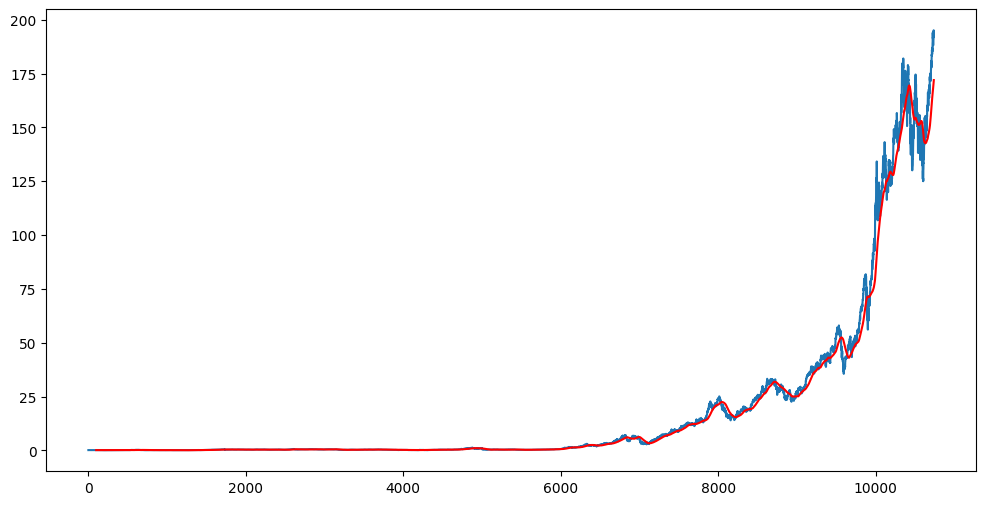

In [4]:
#plotting MA and df
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [5]:
#MA for 200 days
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
10736    156.46785
10737    156.68730
10738    156.95040
10739    157.22505
10740    157.47250
Name: Close, Length: 10741, dtype: float64

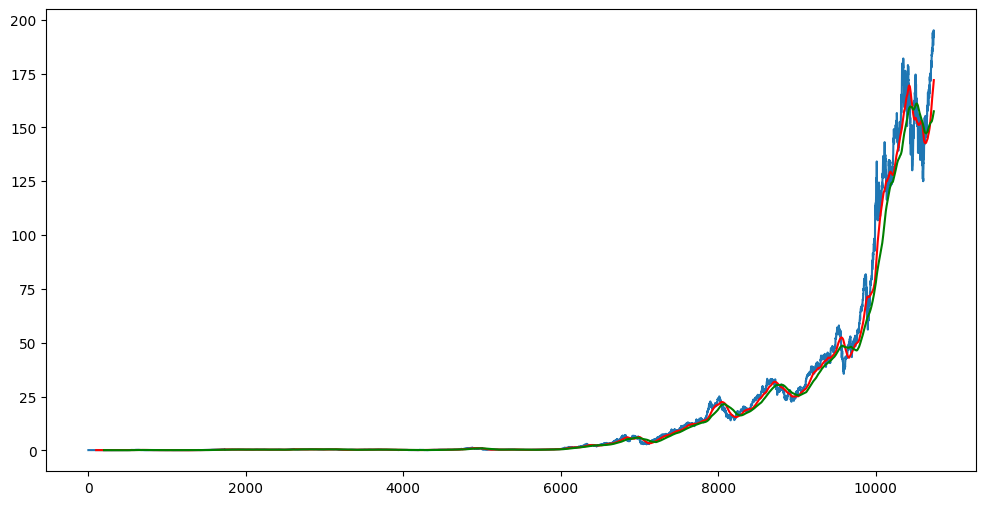

In [6]:

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [8]:
df.shape

(10741, 7)

In [7]:
# splitting dataset into training ans testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):])

print(data_training.shape)
print(data_testing.shape)



(7518, 1)
(3223, 1)


In [9]:

data_training.head()

,Close
0,0.128348
1,0.121652
2,0.112723
3,0.115513
4,0.118862


In [10]:
data_testing.head()

,Close
7518,10.133929
7519,10.090000
7520,9.951429
7521,10.319286
7522,10.328214


In [11]:
# Scaling of data between 0-1 using minmax scaler from sklearn
scaler = MinMaxScaler(feature_range = (0,1))




In [12]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape



(7518, 1)

In [13]:
x_train = []
y_train = []


In [14]:

for i in range(100 ,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100 : i])
  y_train.append(data_training_array[i,0])


x_train,y_train = np.array(x_train) , np.array(y_train)
x_train.shape





(7418, 100, 1)

In [15]:
#buiding our LSTM model

In [16]:
model = Sequential()
model.add(LSTM(units = 50 ,activation='relu' ,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation='relu' ,return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation='relu' ,return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation='relu' ))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [18]:
compiled_model = model.compile(optimizer = 'adam' , loss = 'mean_squared_error'  )
model.fit(x_train,y_train ,epochs = 50);

Epoch 1/50
232/232 [==============================] - 211s 856ms/step - loss: 0.0049
Epoch 2/50
232/232 [==============================] - 180s 776ms/step - loss: 0.0018
Epoch 3/50
232/232 [==============================] - 173s 745ms/step - loss: 0.0021
Epoch 4/50
232/232 [==============================] - 170s 733ms/step - loss: 0.0018
Epoch 5/50
232/232 [==============================] - 164s 708ms/step - loss: 0.0015
Epoch 6/50
232/232 [==============================] - 173s 745ms/step - loss: 0.0016
Epoch 7/50
232/232 [==============================] - 170s 733ms/step - loss: 0.0014
Epoch 8/50
232/232 [==============================] - 169s 726ms/step - loss: 0.0014
Epoch 9/50
232/232 [==============================] - 170s 732ms/step - loss: 0.0013
Epoch 10/50
232/232 [==============================] - 166s 716ms/step - loss: 0.0013
Epoch 11/50
232/232 [==============================] - 168s 725ms/step - loss: 0.0012
Epoch 12/50
232/232 [==============================] - 166s 715

In [60]:
model.save('LSTM_model.h5')

In [40]:
data_testing.head()

,Close
7518,10.133929
7519,10.090000
7520,9.951429
7521,10.319286
7522,10.328214


In [41]:
# for testing we need the data for past 100 days so wqe need to add past 100 days data from 7518th row!!

past_100_days = data_training.tail(100)
past_100_days

,Close
7418,9.071071
7419,9.161429
7420,9.360357
7421,9.227143
7422,9.065000
...,...
7513,10.318571
7514,10.440000
7515,10.398571
7516,10.245000


In [58]:
final_df = pd.concat([past_100_days,data_testing])

In [59]:
final_df



,Close
7418,9.071071
7419,9.161429
7420,9.360357
7421,9.227143
7422,9.065000
...,...
10736,193.990005
10737,193.729996
10738,195.100006
10739,193.130005


In [44]:
final_df.head(100)

,Close
0,9.071071
1,9.161429
2,9.360357
3,9.227143
4,9.065000
...,...
95,10.318571
96,10.440000
97,10.398571
98,10.245000


In [45]:

#scaling down the test data
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00310619],
       [0.0035904 ],
       [0.00465642],
       ...,
       [1.        ],
       [0.98944314],
       [0.98306614]])

In [26]:
input_data.shape

(3323, 1)

In [46]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i,0])


In [47]:
x_test ,y_test = np.array(x_test) , np.array(y_test)

x_test.shape
y_test.shape

(3223,)

In [48]:
#making predictions
y_predict = model.predict(x_test);
y_predict.shape

101/101 [==============================] - 8s 83ms/step


(3223, 1)

In [49]:
y_test

array([0.00880185, 0.00856644, 0.00782386, ..., 1.        , 0.98944314,
       0.98306614])

In [50]:
y_predict

array([[0.0311246 ],
       [0.0313556 ],
       [0.03159667],
       ...,
       [0.81874907],
       [0.82204527],
       [0.8245667 ]], dtype=float32)

In [51]:
#now we need to scale the values for that we are finding the factor by which we scaled ddown the data
scaler.scale_

array([0.00535881])

In [52]:
scale_factor = 1/0.00535881
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

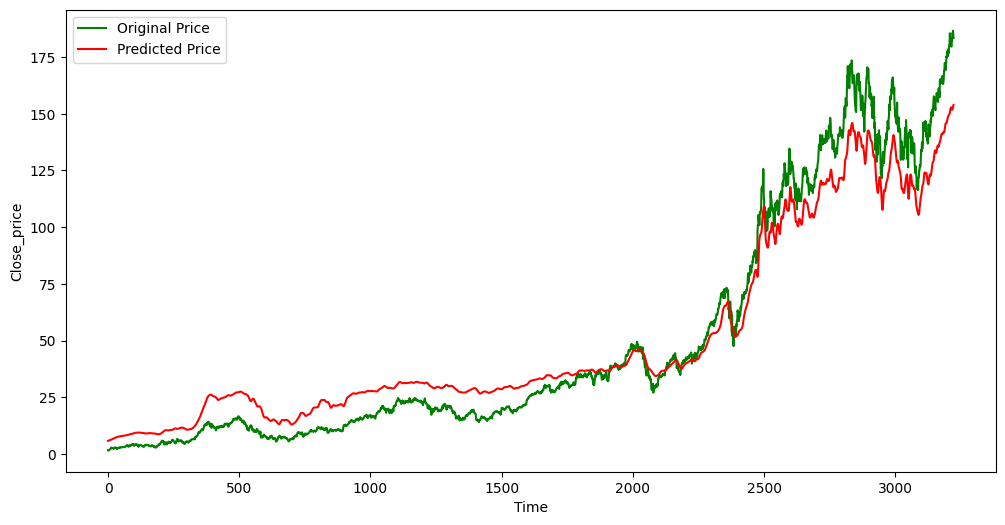

In [53]:
plt.figure(figsize = (12,6))
plt.plot(y_test , 'g', label = 'Original Price')
plt.plot(y_predict , 'r' , label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Close_price')

plt.legend()
plt.show()


In [35]:
# calculate the rmse performance metrices
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test,y_predict))


11.615157474772893